In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
from numpy.random import rand, randn

In [3]:
n, d, k = 100, 2, 2

In [4]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results


Solution
===

In [5]:
def compute_log_p(X, mean, sigma):
    ''' fill your code in here...
    '''
    
    f = ((2*np.pi)**(d/2)) * np.sqrt(np.linalg.det(sigma))
    e = [-(1/2) * np.dot(np.dot((X[i,0:1]-mean),np.linalg.inv(sigma)),(X[i,0:1] - mean)) for i in range(n)]
    p = (1/f)*np.exp(e)

    return p


In [6]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

In [7]:
assignments = np.argmax(log_ps, axis=0)

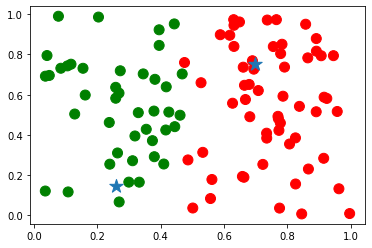

In [8]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c = colors,s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()